In [367]:
###########################
# data libraries
###########################
import pandas as pd
import numpy as np

###########################
# plot libraries
###########################
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

###########################
# Learn Libraries
###########################
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

###########################
# Neural Networks Libraries
###########################
import torch
import torch.nn as nn
import torch.nn.functional as F

###########################
# Another Libraries
###########################
import string
import random

In [368]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. 
from scipy import optimize as opt
import matplotlib.pyplot as plt

In [369]:
df = pd.read_csv("train.csv")
df.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329975 entries, 0 to 329974
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               329975 non-null  int64 
 1   Month              329975 non-null  int64 
 2   Consumer_type      329975 non-null  object
 3   Consumption        329975 non-null  int64 
 4   Consumer_number    329975 non-null  object
 5   Installation_zone  329975 non-null  object
dtypes: int64(3), object(3)
memory usage: 15.1+ MB


In [387]:
df["Consumer_type"].info()

<class 'pandas.core.series.Series'>
Index: 141042 entries, 1 to 329974
Series name: Consumer_type
Non-Null Count   Dtype
--------------   -----
141042 non-null  int32
dtypes: int32(1)
memory usage: 1.6 MB


In [371]:
columns = ["Consumer_type","Consumer_number","Installation_zone"]
for feature in columns:
  le = LabelEncoder()
  df[feature] = le.fit_transform(df[feature])

df.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,1,0,13456,0
1,2013,1,2,5,1273,11
2,2013,1,1,6,23079,11
3,2013,1,1,1,17600,11
4,2013,1,1,13,8598,11


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329975 entries, 0 to 329974
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Year               329975 non-null  int64
 1   Month              329975 non-null  int64
 2   Consumer_type      329975 non-null  int32
 3   Consumption        329975 non-null  int64
 4   Consumer_number    329975 non-null  int32
 5   Installation_zone  329975 non-null  int32
dtypes: int32(3), int64(3)
memory usage: 11.3 MB


In [373]:
indices_tipo_1 = df[df['Consumer_type'] == 1].index

# Reduzir em 80% os dados do tipo 1
quantidade_reduzida = int(len(indices_tipo_1) * 0.9)
indices_reduzidos = indices_tipo_1[:quantidade_reduzida]

# Remover os índices reduzidos do DataFrame
df.drop(indices_reduzidos, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 141042 entries, 1 to 329974
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Year               141042 non-null  int64
 1   Month              141042 non-null  int64
 2   Consumer_type      141042 non-null  int32
 3   Consumption        141042 non-null  int64
 4   Consumer_number    141042 non-null  int32
 5   Installation_zone  141042 non-null  int32
dtypes: int32(3), int64(3)
memory usage: 5.9 MB


<Axes: xlabel='Installation_zone', ylabel='Count'>

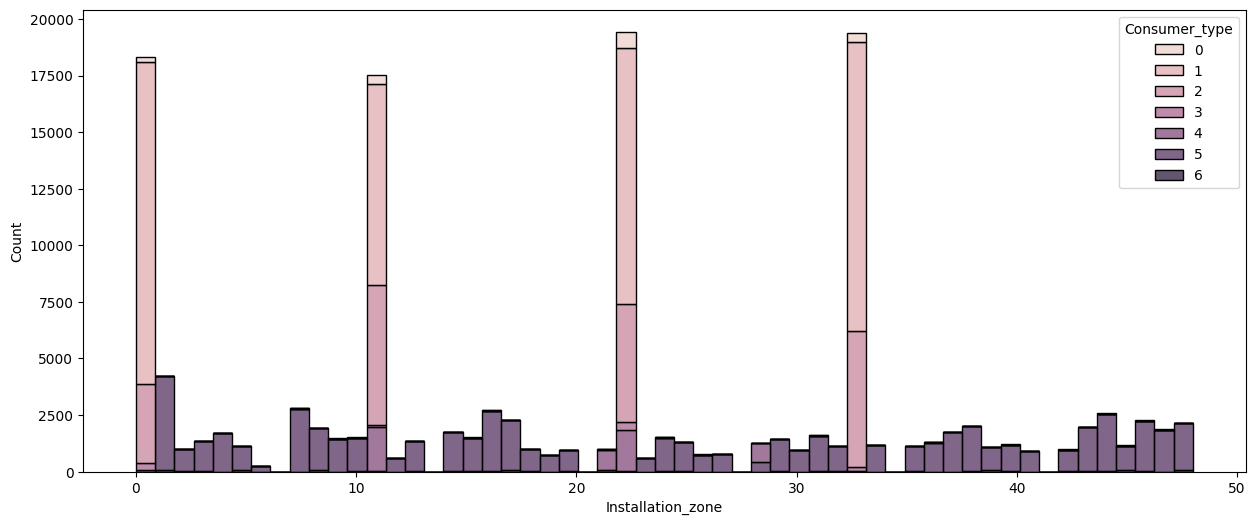

In [374]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Installation_zone',hue='Consumer_type',multiple="stack",)

In [375]:
y = df["Consumer_type"]
x = df[["Year", "Month", "Consumption", "Consumer_number", "Installation_zone"]]

1         2
5         2
6         2
8         2
9         2
         ..
329970    1
329971    5
329972    5
329973    5
329974    1
Name: Consumer_type, Length: 141042, dtype: int32

In [376]:
X = torch.tensor(x.values, dtype = torch.float)
Y = torch.LongTensor(y.values)

In [377]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True)


In [378]:
class NN_model(nn.Module):
    def __init__(self):
        super(NN_model, self).__init__()
        self.linear_nn_stack = nn.Sequential(
            nn.Linear(5, 10),
            nn.Sigmoid(),
            nn.Linear(10, 15),
            nn.ReLU(),
            nn.Linear(15, 7),
            nn.Softmax(),
        )

    def forward(self, x):
        logits = self.linear_nn_stack(x)
        return logits

In [379]:
model = NN_model()

learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), learning_rate)


In [380]:
epochs = 500
train_losses=[]

for i in range(epochs):
    i= i+1
    y_pred=model.forward(x_train)
    loss=criterion(y_pred,y_train)
    train_losses.append(loss)
    if i % 10 == 0:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

c:\Users\Emers\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch number: 10 and the loss : 1.9325937032699585
Epoch number: 20 and the loss : 1.9237403869628906
Epoch number: 30 and the loss : 1.9130405187606812
Epoch number: 40 and the loss : 1.900284767150879
Epoch number: 50 and the loss : 1.8852442502975464
Epoch number: 60 and the loss : 1.867107629776001
Epoch number: 70 and the loss : 1.8462446928024292
Epoch number: 80 and the loss : 1.8231115341186523
Epoch number: 90 and the loss : 1.7988169193267822
Epoch number: 100 and the loss : 1.7714202404022217
Epoch number: 110 and the loss : 1.7463245391845703
Epoch number: 120 and the loss : 1.7349108457565308
Epoch number: 130 and the loss : 1.7271077632904053
Epoch number: 140 and the loss : 1.7220838069915771
Epoch number: 150 and the loss : 1.7188221216201782
Epoch number: 160 and the loss : 1.716260552406311
Epoch number: 170 and the loss : 1.7136337757110596
Epoch number: 180 and the loss : 1.7129212617874146
Epoch number: 190 and the loss : 1.7123864889144897
Epoch number: 200 and th

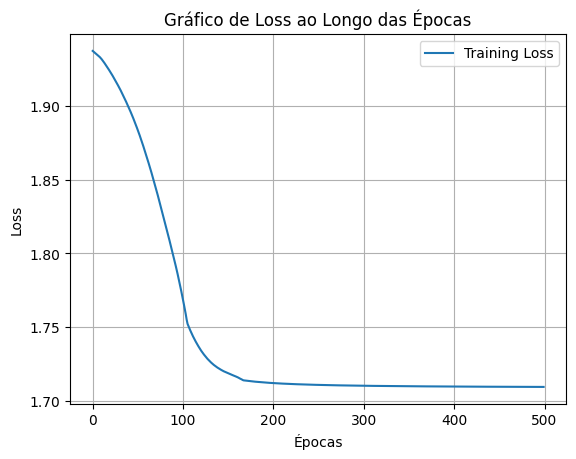

In [381]:
losses = torch.tensor(train_losses,requires_grad=True)

plt.plot(losses.detach().numpy(), label='Training Loss')
plt.title('Gráfico de Loss ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [382]:
indices_maior_valor = torch.argmax(y_pred, dim=1)
maiores_valores = y_pred[torch.arange(len(y_pred)), indices_maior_valor]
acc = (torch.argmax(y_pred, 1) == y_train).float().mean()
acc

tensor(0.4470)

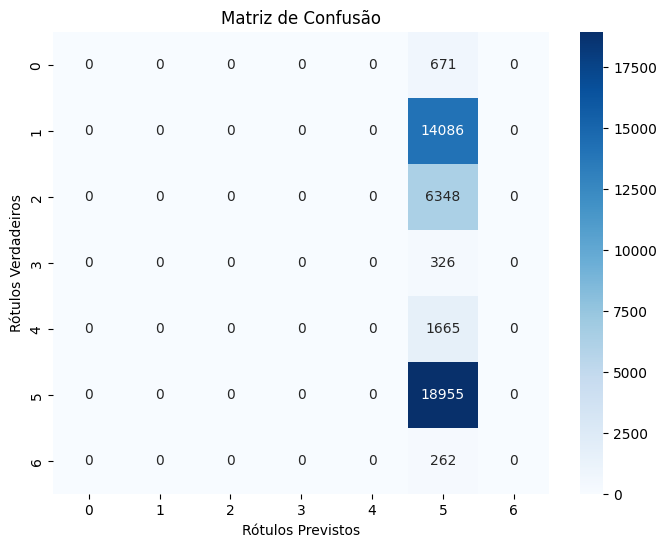

In [383]:
y_test_pred = model(x_test)
y_test_pred = torch.argmax(y_test_pred, dim=1)

predicted = y_test_pred.numpy()
targets = y_test.numpy()

conf_matrix = confusion_matrix(targets, predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()